# Regression of Stock Market Values & Tweet Sentiment Analysis
## Karl Gilmartin, Eanna Bonner, Dara Newsome
### The code was created and submitted as part of "Data Analytics" in module CS4422

In [243]:
import pandas as pd
import re
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import seaborn as sns
import plotly.express as px
import string


 Reading CSV files

In [244]:
tweets = pd.read_csv('Tweet.csv')
company_tweet = pd.read_csv('Company_Tweet.csv')
result = pd.read_csv('result.csv')
stock = pd.read_csv('CompanyValues.csv')
reaction = pd.read_csv('reaction.csv')

### Sentiment Analysis -Cleaning

In [245]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 
             're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

### Removing word in the list above to increase accuracy of sentiment

In [246]:
STOPWORDS = set(stopwordlist)
def stopword_remover(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
tweets['body'] = tweets['body'].apply(lambda text: stopword_remover(text))
tweets['body'].head()

0    lx21 made $10,008 $AAPL -Check out! http://pro...
1    Insanity today weirdo massive selling. $aapl b...
2    S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...
3    $GM $TSLA: Volkswagen Pushes 2014 Record Recal...
4    Swing Trading: Up To 8.91% Return In 14 Days h...
Name: body, dtype: object

In [247]:
eng_punct = string.punctuation
punct_list = eng_punct
def clean_punct(text):
    translator = str.maketrans('', '', punct_list)
    return text.translate(translator)
tweets['body']= tweets['body'].apply(lambda x: clean_punct(x))
tweets['body'].head()

0    lx21 made 10008 AAPL Check out httpprofitly1Mn...
1    Insanity today weirdo massive selling aapl bid...
2    SP100 Stocks Performance HD LOW SBUX TGT DVN I...
3    GM TSLA Volkswagen Pushes 2014 Record Recall T...
4    Swing Trading Up To 891 Return In 14 Days http...
Name: body, dtype: object

In [248]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)\1{2,}', r'\1', text)
tweets['body'] = tweets['body'].apply(lambda x: cleaning_repeating_char(x))
tweets['body'].tail()

3717959    That SPY SPX pump last hour EOY EOQ EOM top wi...
3717960    In 2020 I may start Tweeting positive news XOM...
3717961    Patiently Waiting no twitter sitter tweets tsl...
3717962                      I dont discriminate I aapl msft
3717963    AAPL patent 10522475 Vertical interconnects se...
Name: body, dtype: object

In [249]:
def cleaning_URLs(datas):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',datas)
tweets['body'] = tweets['body'].apply(lambda x: cleaning_URLs(x))
tweets['body'].tail()

3717959    That SPY SPX pump last hour EOY EOQ EOM top wi...
3717960    In 2020 I may start Tweeting positive news XOM...
3717961    Patiently Waiting no twitter sitter tweets tsl...
3717962                      I dont discriminate I aapl msft
3717963    AAPL patent 10522475 Vertical interconnects se...
Name: body, dtype: object

In [250]:
def cleaning_numbers(datas):
    return re.sub('[0-9]+', '', datas)
tweets['body'] = tweets['body'].apply(lambda x: cleaning_numbers(x))
tweets['body'].tail()

3717959    That SPY SPX pump last hour EOY EOQ EOM top wi...
3717960    In  I may start Tweeting positive news XOM CVX...
3717961    Patiently Waiting no twitter sitter tweets tsl...
3717962                      I dont discriminate I aapl msft
3717963    AAPL patent  Vertical interconnects self shiel...
Name: body, dtype: object

Companies

In [251]:
companies = result['ticker_symbol'].unique()
print(companies)
company_df = pd.DataFrame({'company': companies})

['AAPL' 'AMZN' 'TSLA' 'MSFT' 'GOOG' 'GOOGL']


In [252]:
company_df.head()

,company
0,AAPL
1,AMZN
2,TSLA
3,MSFT
4,GOOG


## Tweets

## Sentiment Analysis
### Sentiment Function

In [253]:
meaning = []
def sentiment_scores(sentence, sid_obj):
    sentiment_dict = sid_obj.polarity_scores(sentence)
    
    if sentiment_dict['compound'] >= 0.05 :
        x = "Positive"
 
    elif sentiment_dict['compound'] <= - 0.05 :
        x = "Negative"
 
    else :
        x = "Neutral"
    meaning.append(x)
    #print(meaning)

### Using sentiment analysis for the tweets body and adding the sentiment to a new col called 'meaning'

In [254]:
# sid_obj = SentimentIntensityAnalyzer()

# for item in tweets['body']:
#     sentiment_scores(item, sid_obj)

# tweets['meaning'] = meaning

### Saving this dataframe to a new dataframe so the process only has to be done onece

In [255]:
# tweets.to_csv('result.csv')

### Working with the new dataframe

In [256]:
result.head()

,Unnamed: 0,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,reaction
0,0,550441509175443456,VisualStockRSRC,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,AAPL,Neutral
1,1,550441672312512512,KeralaGuy77,1420070496,Insanity of today weirdo massive selling. $aap...,0,0,0,AAPL,Negative
2,2,550441732014223360,DozenStocks,1420070510,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0,AMZN,Negative
3,3,550442977802207232,ShowDreamCar,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1,TSLA,Neutral
4,4,550443807834402816,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL,Neutral


In [257]:
result.tail()

,Unnamed: 0,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,reaction
4336440,4336440,1212159838882533376,ShortingIsFun,1577836401,In 2020 I may start Tweeting out positive news...,0,0,1,TSLA,Negative
4336441,4336441,1212160015332728833,Commuternyc,1577836443,Patiently Waiting for the no twitter sitter tw...,0,0,5,TSLA,Negative
4336442,4336442,1212160410692046849,MoriaCrypto,1577836537,I don't discriminate. I own both $aapl and $ms...,1,0,1,AAPL,Neutral
4336443,4336443,1212160410692046849,MoriaCrypto,1577836537,I don't discriminate. I own both $aapl and $ms...,1,0,1,MSFT,Neutral
4336444,4336444,1212160477159206912,treabase,1577836553,"$AAPL #patent 10,522,475 Vertical interconnect...",0,0,0,AAPL,Neutral


In [258]:
print(result.shape)

(4336445, 10)


In [259]:
result.describe()

,Unnamed: 0,tweet_id,post_date,comment_num,retweet_num,like_num
count,4.336445e+06,4.336445e+06,4.336445e+06,4.336445e+06,4.336445e+06,4.336445e+06
mean,2.168222e+06,8.834282e+17,1.499461e+09,2.923863e-01,6.347647e-01,2.103625e+00
std,1.251824e+06,1.927735e+17,4.596080e+07,1.885788e+00,6.986371e+00,1.371744e+01
min,0.000000e+00,5.504415e+17,1.420070e+09,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.084111e+06,7.185450e+17,1.460149e+09,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.168222e+06,8.825934e+17,1.499262e+09,0.000000e+00,0.000000e+00,0.000000e+00
75%,3.252333e+06,1.054776e+18,1.540313e+09,0.000000e+00,0.000000e+00,1.000000e+00
max,4.336444e+06,1.212160e+18,1.577837e+09,6.310000e+02,9.990000e+02,9.990000e+02


In [260]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4336445 entries, 0 to 4336444
Data columns (total 10 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   Unnamed: 0     int64 
 1   tweet_id       int64 
 2   writer         object
 3   post_date      int64 
 4   body           object
 5   comment_num    int64 
 6   retweet_num    int64 
 7   like_num       int64 
 8   ticker_symbol  object
 9   reaction       object
dtypes: int64(6), object(4)
memory usage: 330.8+ MB


In [261]:
result = result.replace('Negative', -1)
result = result.replace('Neutral', 0)
result = result.replace('Positive', 1)

In [262]:
result.head(10)

,Unnamed: 0,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,reaction
0,0,550441509175443456,VisualStockRSRC,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,AAPL,0
1,1,550441672312512512,KeralaGuy77,1420070496,Insanity of today weirdo massive selling. $aap...,0,0,0,AAPL,-1
2,2,550441732014223360,DozenStocks,1420070510,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0,AMZN,-1
3,3,550442977802207232,ShowDreamCar,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1,TSLA,0
4,4,550443807834402816,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL,0
5,5,550443807834402816,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,TSLA,0
6,6,550443808606126081,aaplstocknews,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL,0
7,7,550443808606126081,aaplstocknews,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,TSLA,0
8,8,550443809700851716,iknowfirst,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL,0
9,9,550443809700851716,iknowfirst,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,TSLA,0


### Converting dates from ASCII format to datetime format

In [263]:
dates = []
def toDate(num):
    temp = datetime.fromtimestamp(int(num))
    dates.append(temp)


In [264]:
for date in result['post_date']:
    toDate(date)

In [265]:
result['date'] = dates

### Marking a new date column

In [266]:
result['date'] = pd.to_datetime(result['date']).dt.date

In [267]:
result = result.drop(['Unnamed: 0'], axis=1)

In [268]:
result = result.drop(['post_date'], axis=1)

In [269]:
result.head()

,tweet_id,writer,body,comment_num,retweet_num,like_num,ticker_symbol,reaction,date
0,550441509175443456,VisualStockRSRC,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,AAPL,0,2015-01-01
1,550441672312512512,KeralaGuy77,Insanity of today weirdo massive selling. $aap...,0,0,0,AAPL,-1,2015-01-01
2,550441732014223360,DozenStocks,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0,AMZN,-1,2015-01-01
3,550442977802207232,ShowDreamCar,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1,TSLA,0,2015-01-01
4,550443807834402816,i_Know_First,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL,0,2015-01-01


### Checking for Null Values

In [270]:
result.isnull().values.any()


True

In [271]:
result.isnull().sum().sum()

55919

[Text(0.5, 1.0, 'Missing Data')]

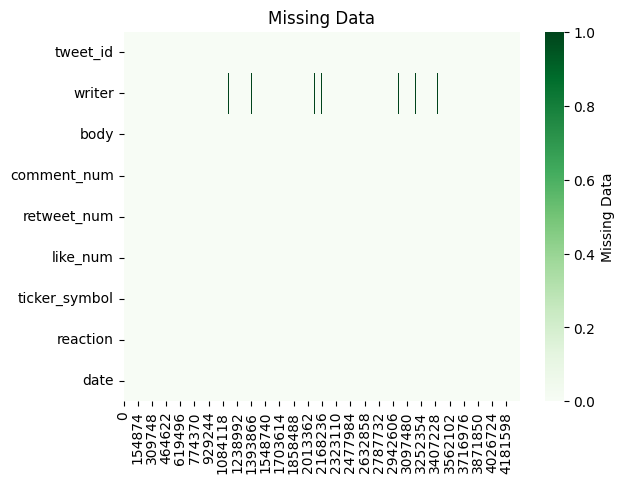

In [36]:
# plt.figure(figsize=(10,6))
sns.heatmap(result.isna().transpose(),
            cmap="Greens",
            cbar_kws={'label': 'Missing Data'}).set(title="Missing Data")

In [272]:
result['writer'] = result['writer'].fillna("Unknown Author")

In [273]:
result['writer'].isnull().values.any()

False

In [274]:
result = result.drop('writer', axis=1)


### Number of Tweets releating to each company

In [275]:
num_tweets_company = result.groupby(result['ticker_symbol'].tolist(), as_index=False).size()

In [276]:
num_tweets_company.head()

,index,size
0,AAPL,1425013
1,AMZN,718715
2,GOOG,392569
3,GOOGL,327569
4,MSFT,375711


Text(0.5, 1.0, 'Number of tweets releated to companies')

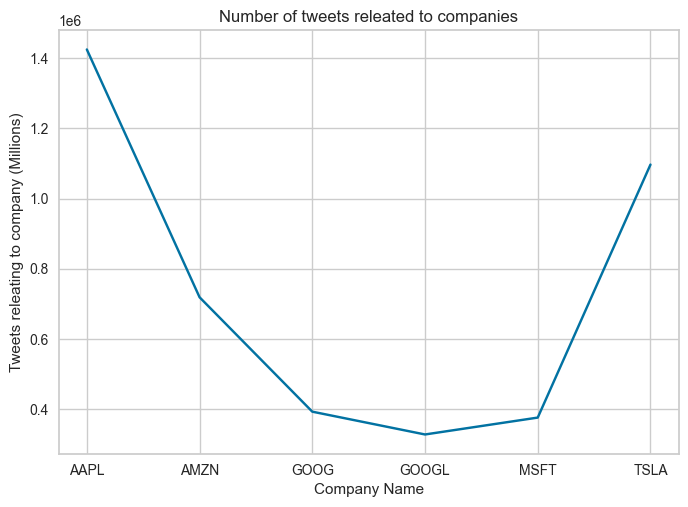

In [277]:
plt.plot( num_tweets_company['index'], num_tweets_company['size'])
plt.ylabel('Tweets releating to company (Millions)')
plt.xlabel('Company Name')
plt.title('Number of tweets releated to companies')

In [43]:
company_tweet_likes = []
company_tweet_retweet = []
company_tweet_comment = []
for name in companies:
    company_tweet_comment.append(result.loc[result['ticker_symbol'] == name, 'comment_num'].sum())
    company_tweet_likes.append(result.loc[result['ticker_symbol'] == name, 'like_num'].sum())
    company_tweet_retweet.append(result.loc[result['ticker_symbol'] == name, 'retweet_num'].sum())
print('Likes per company',company_tweet_likes)
print('Retweets per company',company_tweet_retweet)
print('Comments per company',company_tweet_comment)

Likes per company [1378670, 984166, 5769051, 347520, 235928, 406917]
Retweets per company [722396, 419783, 1078386, 193364, 147143, 191550]
Comments per company [222048, 152200, 762813, 41533, 30704, 58619]


In [278]:
data = [['Likes', 1378670,984166, 5769051, 347520, 235928, 406917 ],
        ['Retweets',722396, 419783, 1078386, 193364, 147143, 191550 ],
        ['Comments', 222048, 152200, 762813, 41533, 30704, 58619]]
df_info = pd.DataFrame(data, columns =['reaction', 'AAPL', 'AMZN', 'TSLA', 'MSFT', 'GOOG', 'GOOGL'])
df_info

,reaction,AAPL,AMZN,TSLA,MSFT,GOOG,GOOGL
0,Likes,1378670,984166,5769051,347520,235928,406917
1,Retweets,722396,419783,1078386,193364,147143,191550
2,Comments,222048,152200,762813,41533,30704,58619


In [279]:
long_df = px.data.medals_long()

fig = px.bar(df_info, x="reaction", y=['AAPL', 'AMZN', 'TSLA', 'MSFT', 'GOOG', 'GOOGL'], title="Long-Form Input",width=800, height=800, color_discrete_sequence=["#76B947", "#B1D8B7", "#2F5233", "#94C973", "#08313A", '#32CD30'] )
fig.show()

In [280]:
result.head()

,tweet_id,body,comment_num,retweet_num,like_num,ticker_symbol,reaction,date
0,550441509175443456,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,AAPL,0,2015-01-01
1,550441672312512512,Insanity of today weirdo massive selling. $aap...,0,0,0,AAPL,-1,2015-01-01
2,550441732014223360,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0,AMZN,-1,2015-01-01
3,550442977802207232,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1,TSLA,0,2015-01-01
4,550443807834402816,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL,0,2015-01-01


### Dropping Colmuns which will not be used in model

In [281]:
# df = (result.loc[(result['date'] >= datetime(2018, 1, 1).date()) & (result['date'] <= datetime(2020, 1, 1).date())])
df = result
df.tail()
df_reduce = df
df_reduce = df_reduce.drop('tweet_id', axis=1)
df_reduce = df_reduce.drop('comment_num', axis=1)
df_reduce = df_reduce.drop('retweet_num', axis=1)
df_reduce = df_reduce.drop('like_num', axis=1)

### Reducing dataframe to only Amazon

In [282]:
df_reduce = df_reduce.loc[df_reduce['ticker_symbol'] == 'AMZN']

In [283]:
df_reduce.head(4)

,body,ticker_symbol,reaction,date
2,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,AMZN,-1,2015-01-01
27,Top 10 searched #stocks of #2014 $AAPL $FB $BA...,AMZN,1,2015-01-01
37,RT @SeekingAlpha: A Look At BlackBerry's Deals...,AMZN,0,2015-01-01
38,Jeff Bezos lost $7.4 billion in Amazon's worst...,AMZN,-1,2015-01-01


### Lengt of the tweets releating to Amazon

<Axes: title={'center': 'Length of tweets over time'}, xlabel='Tweets', ylabel='Length of tweets'>

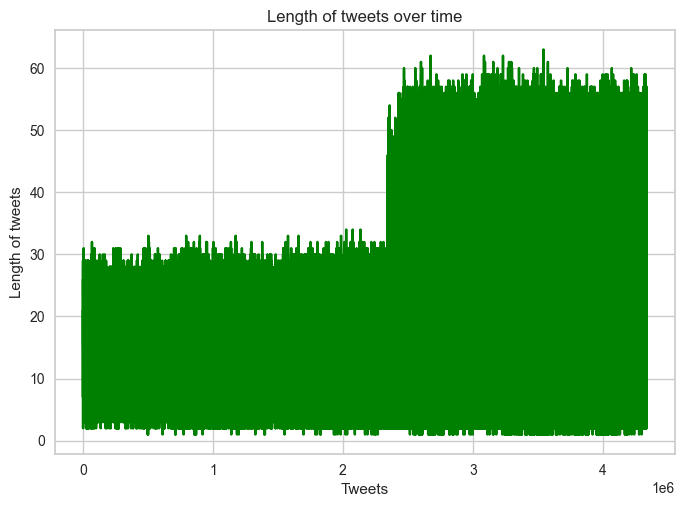

In [284]:
body_len = df_reduce['body'].str.split().str.len()
body_len.plot.line(color='green', xlabel='Tweets', ylabel='Length of tweets', title='Length of tweets over time')


In [285]:
df_reduce = df_reduce.reset_index(drop=True)
df_reduce.to_csv('data.csv', index=False)

In [286]:
df_reduce.head()

,body,ticker_symbol,reaction,date
0,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,AMZN,-1,2015-01-01
1,Top 10 searched #stocks of #2014 $AAPL $FB $BA...,AMZN,1,2015-01-01
2,RT @SeekingAlpha: A Look At BlackBerry's Deals...,AMZN,0,2015-01-01
3,Jeff Bezos lost $7.4 billion in Amazon's worst...,AMZN,-1,2015-01-01
4,Jeff Bezos lost $7.4 billion in #Amazon worst ...,AMZN,-1,2015-01-01


In [287]:
df_reduce.shape

(718715, 4)

### Understanding the number or data entries in dataframe 

In [288]:
unique_days = df_reduce['date'].unique()
print(len(unique_days))

1826


In [289]:
data = {'date': [0],'AMZN': 0 }
df_sum= pd.DataFrame(data)
df_sum.head()


,date,AMZN
0,0,0


### Getting sentiment score for every unique day and adding it into dataframe

In [290]:
days = df_reduce['date'].unique()
print(date)
for date in days:
    
    AMZN = ((result.loc[(result['ticker_symbol'] == 'AMZN' )& (result['date'] == date), 'reaction'].sum())/ (len(result.loc[(result['ticker_symbol'] == 'AMZN' )& (result['date'] == date)])))
    data = {'date': [date],'AMZN': AMZN }
    df_sum = df_sum.append(data, ignore_index=True)

1577836553


/var/folders/f0/zf6fxcgs5t778nd1ml7j0xlr0000gn/T/ipykernel_9769/279423811.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/f0/zf6fxcgs5t778nd1ml7j0xlr0000gn/T/ipykernel_9769/279423811.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/f0/zf6fxcgs5t778nd1ml7j0xlr0000gn/T/ipykernel_9769/279423811.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/f0/zf6fxcgs5t778nd1ml7j0xlr0000gn/T/ipykernel_9769/279423811.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/f0/zf6fxcgs5t778nd1ml7j0xlr0000gn/T/ipykernel_9769/279423811.py:7: FutureWarning:

The frame.append method is deprecated and wi

In [291]:
df_sum.head()

,date,AMZN
0,0,0.000000
1,[2015-01-01],-0.145038
2,[2015-01-02],0.241379
3,[2015-01-03],0.298507
4,[2015-01-04],0.223529


### Dropping test row

In [292]:
df_sum = df_sum.drop(0)



In [293]:
df_sum = df_sum.reset_index(drop=True)

In [294]:
df_sum.head()

,date,AMZN
0,[2015-01-01],-0.145038
1,[2015-01-02],0.241379
2,[2015-01-03],0.298507
3,[2015-01-04],0.223529
4,[2015-01-05],0.323843


In [295]:
# df_sum.to_csv('year.csv', index=False)

In [296]:
reaction.head()

,date,AAPL,AMZN,TSLA,MSFT,GOOG,GOOGL
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,"[datetime.date(2015, 1, 1)]",0.257525,-0.145038,0.171717,0.277778,0.383333,0.444444
2,"[datetime.date(2015, 1, 2)]",0.163783,0.241379,0.268657,0.317757,0.344828,0.288288
3,"[datetime.date(2015, 1, 3)]",0.416185,0.298507,0.145833,0.271186,0.658228,0.807143
4,"[datetime.date(2015, 1, 4)]",0.389163,0.223529,0.210526,0.411765,0.495283,0.857143


In [297]:
reaction.tail()

,date,AAPL,AMZN,TSLA,MSFT,GOOG,GOOGL
1822,"[datetime.date(2019, 12, 27)]",0.288714,0.407563,0.196169,0.311005,0.284211,0.371069
1823,"[datetime.date(2019, 12, 28)]",0.271429,0.411765,0.286400,0.329268,0.333333,0.420000
1824,"[datetime.date(2019, 12, 29)]",0.310526,0.447368,0.184834,0.367647,0.340426,0.486486
1825,"[datetime.date(2019, 12, 30)]",0.307377,0.424474,0.142555,0.351020,0.534161,0.320312
1826,"[datetime.date(2019, 12, 31)]",0.279649,0.386076,0.207190,0.357798,0.280702,0.208333


In [298]:
reaction.loc[1551]
# 1493
# 1551

date     [datetime.date(2019, 3, 31)]
AAPL                         0.505495
AMZN                         0.534759
TSLA                         0.137371
MSFT                         0.349515
GOOG                         0.257143
GOOGL                        0.428571
Name: 1551, dtype: object

In [302]:
reaction = reaction.drop(0)

In [303]:
reaction.head()

,date,AAPL,AMZN,TSLA,MSFT,GOOG,GOOGL
1,"[datetime.date(2015, 1, 1)]",0.257525,-0.145038,0.171717,0.277778,0.383333,0.444444
2,"[datetime.date(2015, 1, 2)]",0.163783,0.241379,0.268657,0.317757,0.344828,0.288288
3,"[datetime.date(2015, 1, 3)]",0.416185,0.298507,0.145833,0.271186,0.658228,0.807143
4,"[datetime.date(2015, 1, 4)]",0.389163,0.223529,0.210526,0.411765,0.495283,0.857143
5,"[datetime.date(2015, 1, 5)]",0.223191,0.323843,0.287770,0.151786,0.404682,0.610390


### Sub Dataframe for TESLA, 
### Timeperiod: Model Y relaease month

In [390]:
tsla_stocks = pd.read_csv('stocks.csv')

In [391]:
tsla_stocks = tsla_stocks.loc[tsla_stocks['ticker_symbol'] == 'TSLA']

tsla_stocks = tsla_stocks.reset_index(drop=True)

### Finding the correct months/ dates

In [392]:
tsla_stocks.iloc[2627]

ticker_symbol          TSLA
day_date         2019-01-31
close_value          307.02
volume             12545190
open_value            301.0
high_value         311.5636
low_value             294.0
Name: 2627, dtype: object

In [393]:
tsla_stocks.iloc[2689]

ticker_symbol          TSLA
day_date         2019-04-03
close_value          291.81
volume              7916650
open_value           287.32
high_value           296.17
low_value            287.17
Name: 2689, dtype: object

In [394]:
tsla_stocks = tsla_stocks[2627:2689]

In [395]:

tsla_stocks = tsla_stocks.reset_index(drop=True)

In [396]:
tsla_stocks.tail()

,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value
57,TSLA,2019-03-29,279.86,5980355,278.70,280.16,274.500
58,TSLA,2019-03-30,279.86,5980355,278.70,280.16,274.500
59,TSLA,2019-03-31,279.86,5980355,278.70,280.16,274.500
60,TSLA,2019-04-01,289.18,8093134,282.62,289.20,281.281
61,TSLA,2019-04-02,285.88,5427184,288.30,289.44,283.880


# karl

In [304]:
stocks = pd.read_csv('stocks.csv')

### Basic Information on Stocks

In [305]:
stocks.head()

,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value
0,AMZN,2010-06-01,123.2400,3650661,124.9700,126.5720,123.0200
1,AAPL,2010-06-01,37.2614,218455576,37.0986,37.9914,36.9943
2,GOOGL,2010-06-01,243.6667,2664303,242.6868,248.0565,242.5302
3,MSFT,2010-06-01,25.8900,76120800,25.5300,26.3100,25.5200
4,GOOGL,2010-06-02,249.2233,2513109,245.8439,249.4759,243.2071


[Text(0.5, 1.0, 'Missing Data')]

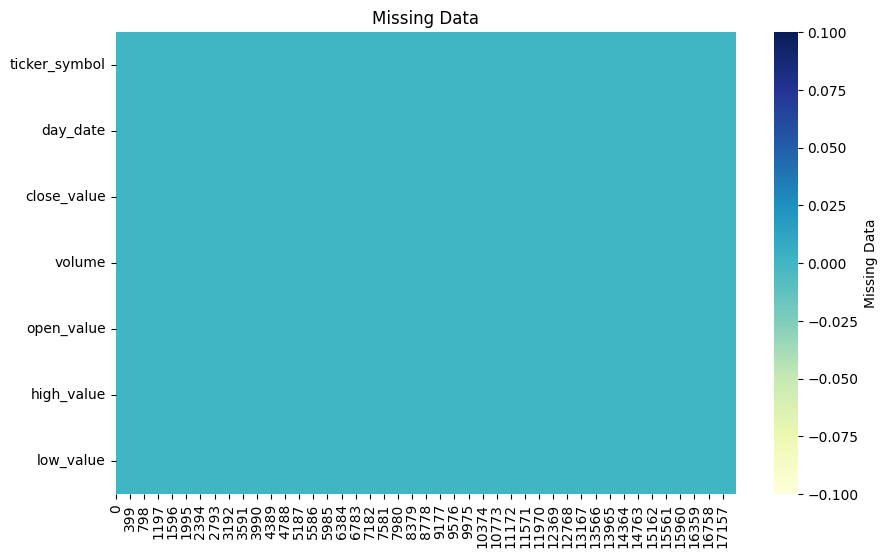

In [75]:
plt.figure(figsize=(10,6))
sns.heatmap(stocks.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'}).set(title='Missing Data')

In [306]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17528 entries, 0 to 17527
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ticker_symbol  17528 non-null  object 
 1   day_date       17528 non-null  object 
 2   close_value    17528 non-null  float64
 3   volume         17528 non-null  int64  
 4   open_value     17528 non-null  float64
 5   high_value     17528 non-null  float64
 6   low_value      17528 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 958.7+ KB


In [307]:
print(stocks.shape)

(17528, 7)


In [308]:
stocks.describe()

,close_value,volume,open_value,high_value,low_value
count,17528.000000,1.752800e+04,17528.000000,17528.000000,17528.000000
mean,455.167040,2.025441e+07,455.314451,459.710597,450.466694
std,469.324583,3.322733e+07,469.588291,473.771691,464.794791
min,15.800000,7.932000e+03,16.140000,16.630000,14.980000
25%,100.300000,2.075086e+06,99.883750,100.927500,98.940000
50%,256.500000,4.835618e+06,256.095000,259.604500,252.177400
75%,735.630000,2.704358e+07,735.740000,742.000000,728.920025
max,2497.940000,4.624423e+08,2500.000000,2525.450000,2467.270000


### Reducing the dataframe to only contain information starting on the 01/01/15 whcih will match the tweet dataframe

In [309]:
stocks = stocks.loc[5954:]

In [310]:
stocks.head()

,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value
5954,MSFT,2015-01-01,46.45,21551090,46.73,47.44,46.45
5955,AAPL,2015-01-01,110.38,41304780,112.82,113.13,110.21
5956,TSLA,2015-01-01,222.41,2392947,223.09,225.68,222.25
5957,GOOG,2015-01-01,526.40,1367110,531.25,532.60,525.80
5958,AMZN,2015-01-01,310.35,2048676,311.55,312.98,310.01


In [311]:
stocks = stocks.reset_index(drop=True)

In [312]:
stocks.head()

,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value
0,MSFT,2015-01-01,46.45,21551090,46.73,47.44,46.45
1,AAPL,2015-01-01,110.38,41304780,112.82,113.13,110.21
2,TSLA,2015-01-01,222.41,2392947,223.09,225.68,222.25
3,GOOG,2015-01-01,526.40,1367110,531.25,532.60,525.80
4,AMZN,2015-01-01,310.35,2048676,311.55,312.98,310.01


In [313]:

stocks.shape

(11574, 7)

### Reducing the size, only to include analysis for one of the companies, AMAZON == AMZN

In [314]:
stocks = stocks.loc[stocks['ticker_symbol'] == 'AMZN']

stocks = stocks.reset_index(drop=True)

In [315]:
stocks.iloc[1825]

ticker_symbol          AMZN
day_date         2019-12-31
close_value         1847.84
volume              2510380
open_value           1842.0
high_value          1853.26
low_value           1832.23
Name: 1825, dtype: object

In [316]:
stocks = stocks.loc[:1825]

### Reducing the dataframe to only contain information starting on the 01/01/15 whcih will match the tweet dataframe


In [317]:
stocks.tail()

,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value
1821,AMZN,2019-12-27,1869.80,6188754,1882.92,1901.40,1866.01
1822,AMZN,2019-12-28,1869.80,6188754,1882.92,1901.40,1866.01
1823,AMZN,2019-12-29,1869.80,6188754,1882.92,1901.40,1866.01
1824,AMZN,2019-12-30,1846.89,3677306,1874.00,1884.00,1840.62
1825,AMZN,2019-12-31,1847.84,2510380,1842.00,1853.26,1832.23


### Boxplots of the stock information

/var/folders/f0/zf6fxcgs5t778nd1ml7j0xlr0000gn/T/ipykernel_9769/2887538280.py:4: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



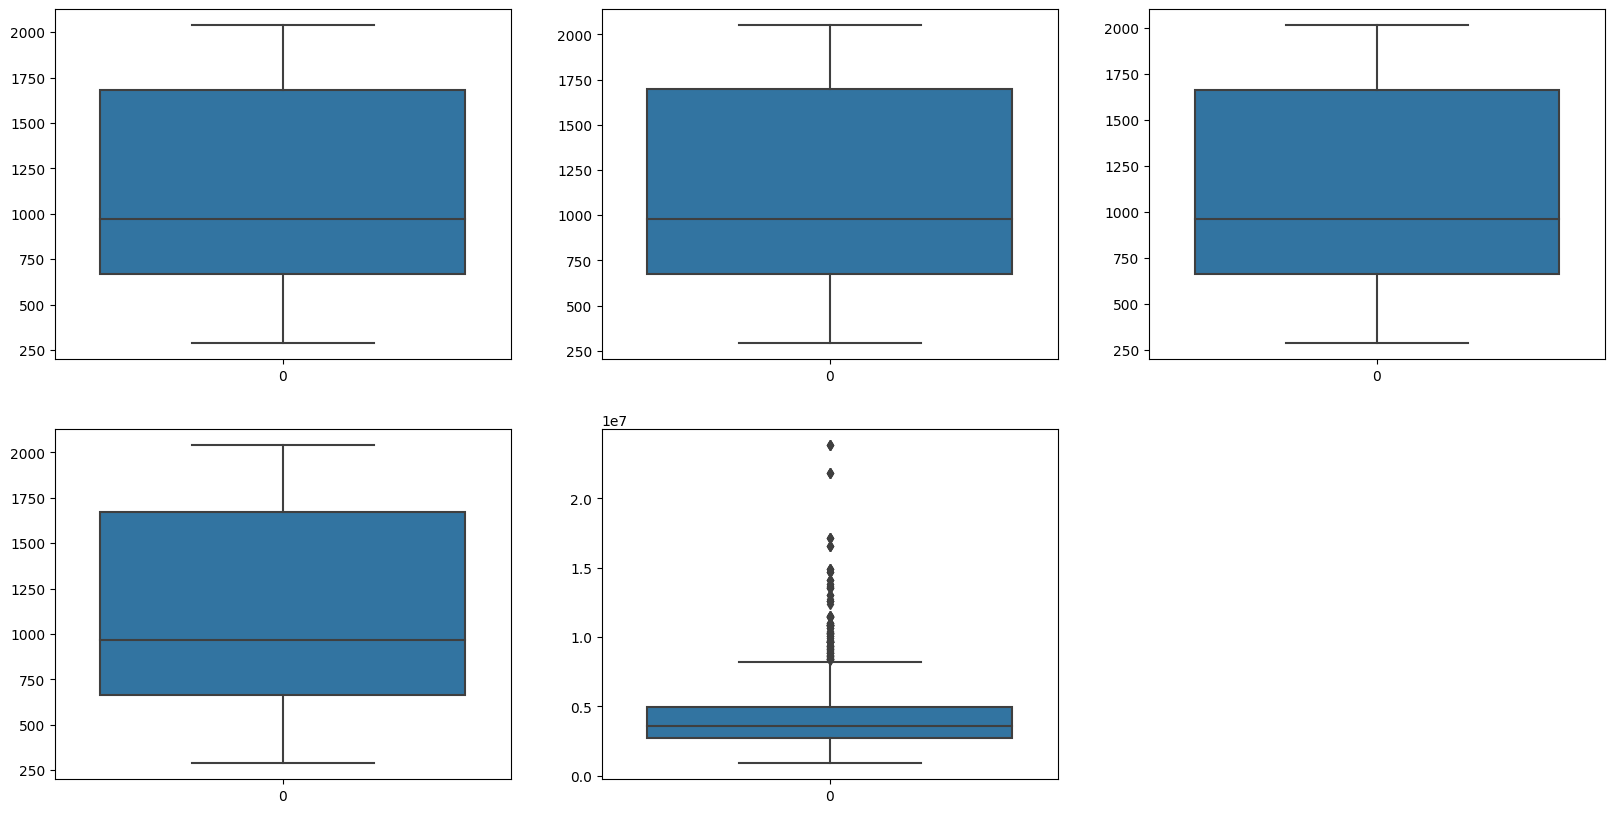

In [88]:
features = ['open_value', 'high_value', 'low_value', 'close_value', 'volume']
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sns.boxplot(stocks[col])
plt.show()

### There is outliers, but no labels in the graph

### No missing dates and for normilisation dates cannot be in dataframe, dropped dates for this reason

In [318]:
stocks1 = stocks
stocks1 = stocks1.drop('day_date', axis=1)


In [319]:
stocks1 = stocks1.drop('ticker_symbol', axis = 1)

In [320]:
stocks1.head()

,close_value,volume,open_value,high_value,low_value
0,310.35,2048676,311.55,312.98,310.0100
1,308.52,2785167,312.58,314.75,306.9601
2,308.52,2785167,312.58,314.75,306.9601
3,308.52,2785167,312.58,314.75,306.9601
4,302.19,2768215,307.01,308.38,300.8500


/var/folders/f0/zf6fxcgs5t778nd1ml7j0xlr0000gn/T/ipykernel_9769/3528010614.py:4: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



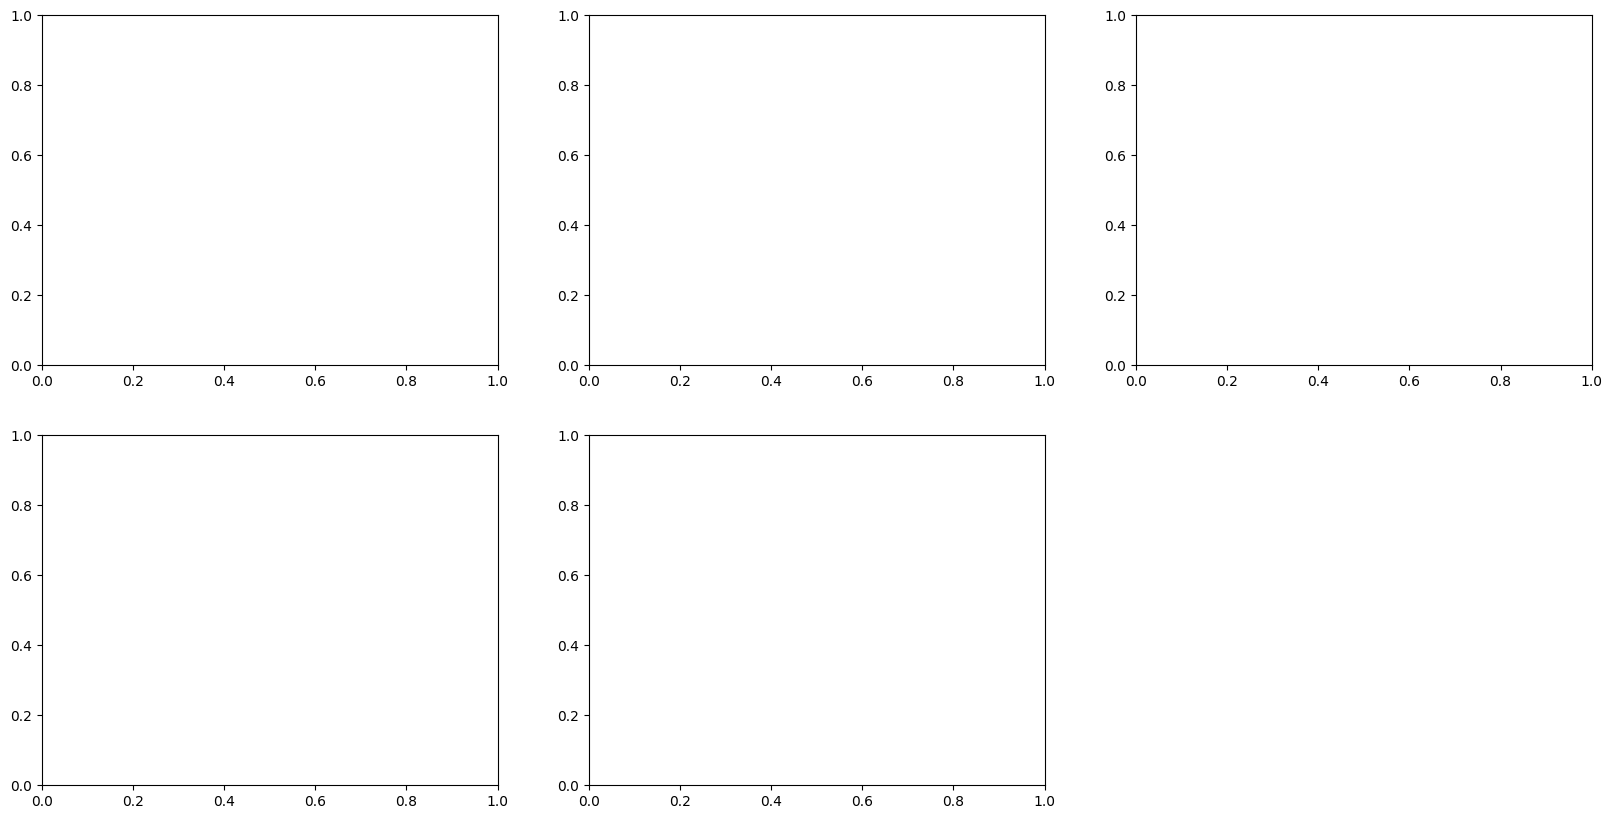

In [92]:
features = ['open_value', 'high_value', 'low_value', 'close_value', 'volume']
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  px.box(stocks[col])
plt.show()

In [102]:


fig = px.box(stocks1, )
fig.show()

### More details on the volume outlier

In [103]:
stocks1 = stocks1.drop('volume', axis = 1)
fig = px.box(stocks1)
fig.show()

In [321]:
stocks.head()

,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value
0,AMZN,2015-01-01,310.35,2048676,311.55,312.98,310.0100
1,AMZN,2015-01-02,308.52,2785167,312.58,314.75,306.9601
2,AMZN,2015-01-03,308.52,2785167,312.58,314.75,306.9601
3,AMZN,2015-01-04,308.52,2785167,312.58,314.75,306.9601
4,AMZN,2015-01-05,302.19,2768215,307.01,308.38,300.8500


In [322]:
# stocks = (stocks.loc[(stocks['day_date'] >= datetime(2018, 1, 1)) & (stocks['day_date'] <= datetime(2019, 1, 1))])
stocks.loc[1096]
# 1096

ticker_symbol          AMZN
day_date         2018-01-01
close_value         1169.47
volume              2678122
open_value          1182.35
high_value           1184.0
low_value            1167.5
Name: 1096, dtype: object

In [323]:
stocks.tail()


,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value
1821,AMZN,2019-12-27,1869.80,6188754,1882.92,1901.40,1866.01
1822,AMZN,2019-12-28,1869.80,6188754,1882.92,1901.40,1866.01
1823,AMZN,2019-12-29,1869.80,6188754,1882.92,1901.40,1866.01
1824,AMZN,2019-12-30,1846.89,3677306,1874.00,1884.00,1840.62
1825,AMZN,2019-12-31,1847.84,2510380,1842.00,1853.26,1832.23


In [324]:
stocks.head()

,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value
0,AMZN,2015-01-01,310.35,2048676,311.55,312.98,310.0100
1,AMZN,2015-01-02,308.52,2785167,312.58,314.75,306.9601
2,AMZN,2015-01-03,308.52,2785167,312.58,314.75,306.9601
3,AMZN,2015-01-04,308.52,2785167,312.58,314.75,306.9601
4,AMZN,2015-01-05,302.19,2768215,307.01,308.38,300.8500


In [325]:
stocks

,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value
0,AMZN,2015-01-01,310.35,2048676,311.55,312.98,310.0100
1,AMZN,2015-01-02,308.52,2785167,312.58,314.75,306.9601
2,AMZN,2015-01-03,308.52,2785167,312.58,314.75,306.9601
3,AMZN,2015-01-04,308.52,2785167,312.58,314.75,306.9601
4,AMZN,2015-01-05,302.19,2768215,307.01,308.38,300.8500
...,...,...,...,...,...,...,...
1821,AMZN,2019-12-27,1869.80,6188754,1882.92,1901.40,1866.0100
1822,AMZN,2019-12-28,1869.80,6188754,1882.92,1901.40,1866.0100
1823,AMZN,2019-12-29,1869.80,6188754,1882.92,1901.40,1866.0100
1824,AMZN,2019-12-30,1846.89,3677306,1874.00,1884.00,1840.6200


In [326]:
df_sum

,date,AMZN
0,[2015-01-01],-0.145038
1,[2015-01-02],0.241379
2,[2015-01-03],0.298507
3,[2015-01-04],0.223529
4,[2015-01-05],0.323843
...,...,...
1821,[2019-12-27],0.407563
1822,[2019-12-28],0.411765
1823,[2019-12-29],0.447368
1824,[2019-12-30],0.424474


### Moving the sentiments form the the dataframe "df_sum" to the stocks dataframe for convienence

In [329]:
sentiments = []
for val in df_sum['AMZN']:
    sentiments.append(val)
    # stocks['sentiment'] = val
print(sentiments)
stocks['sentiment'] = sentiments

[-0.1450381679389313, 0.2413793103448276, 0.29850746268656714, 0.2235294117647059, 0.3238434163701068, 0.3058252427184466, 0.15463917525773196, 0.21395348837209302, 0.25853658536585367, 0.12280701754385964, 0.21153846153846154, 0.2565217391304348, 0.3026634382566586, 0.23591549295774647, 0.20357142857142857, 0.18012422360248448, 0.031914893617021274, 0.14864864864864866, 0.37815126050420167, 0.41409691629955947, 0.3472222222222222, 0.1801470588235294, 0.21804511278195488, 0.16806722689075632, 0.2222222222222222, 0.2857142857142857, 0.2388663967611336, 0.3859060402684564, 0.29851973684210525, 0.2877397831526272, 0.1951219512195122, 0.2222222222222222, 0.27298850574712646, 0.3870246085011186, 0.29692832764505117, 0.31016042780748665, 0.2247191011235955, 0.2808988764044944, 0.21428571428571427, 0.34946236559139787, 0.2554347826086957, 0.1813186813186813, 0.22105263157894736, 0.28502415458937197, 0.19791666666666666, 0.1411042944785276, 0.24778761061946902, 0.26618705035971224, 0.402010050

In [330]:
stocks['close_value']

0        310.35
1        308.52
2        308.52
3        308.52
4        302.19
         ...   
1821    1869.80
1822    1869.80
1823    1869.80
1824    1846.89
1825    1847.84
Name: close_value, Length: 1826, dtype: float64

In [331]:
stocks.head()

,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value,sentiment
0,AMZN,2015-01-01,310.35,2048676,311.55,312.98,310.0100,-0.145038
1,AMZN,2015-01-02,308.52,2785167,312.58,314.75,306.9601,0.241379
2,AMZN,2015-01-03,308.52,2785167,312.58,314.75,306.9601,0.298507
3,AMZN,2015-01-04,308.52,2785167,312.58,314.75,306.9601,0.223529
4,AMZN,2015-01-05,302.19,2768215,307.01,308.38,300.8500,0.323843


## Model

In [332]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [333]:
stocks= stocks.drop('ticker_symbol', axis=1)

In [334]:
stocks.head()

,day_date,close_value,volume,open_value,high_value,low_value,sentiment
0,2015-01-01,310.35,2048676,311.55,312.98,310.0100,-0.145038
1,2015-01-02,308.52,2785167,312.58,314.75,306.9601,0.241379
2,2015-01-03,308.52,2785167,312.58,314.75,306.9601,0.298507
3,2015-01-04,308.52,2785167,312.58,314.75,306.9601,0.223529
4,2015-01-05,302.19,2768215,307.01,308.38,300.8500,0.323843


### Creating a new col for the difference between the closing and opening values between days

In [335]:
stocks['Price Diff'] = stocks['close_value'].diff()

In [336]:
stocks.head()

,day_date,close_value,volume,open_value,high_value,low_value,sentiment,Price Diff
0,2015-01-01,310.35,2048676,311.55,312.98,310.0100,-0.145038,NaN
1,2015-01-02,308.52,2785167,312.58,314.75,306.9601,0.241379,-1.83
2,2015-01-03,308.52,2785167,312.58,314.75,306.9601,0.298507,0.00
3,2015-01-04,308.52,2785167,312.58,314.75,306.9601,0.223529,0.00
4,2015-01-05,302.19,2768215,307.01,308.38,300.8500,0.323843,-6.33


### Nan value for first price differnece, this row must be removed

In [337]:
stocks = stocks.drop(0)
stocks.reset_index(drop=True)

,day_date,close_value,volume,open_value,high_value,low_value,sentiment,Price Diff
0,2015-01-02,308.52,2785167,312.58,314.75,306.9601,0.241379,-1.83
1,2015-01-03,308.52,2785167,312.58,314.75,306.9601,0.298507,0.00
2,2015-01-04,308.52,2785167,312.58,314.75,306.9601,0.223529,0.00
3,2015-01-05,302.19,2768215,307.01,308.38,300.8500,0.323843,-6.33
4,2015-01-06,295.29,3511003,302.24,303.00,292.3800,0.305825,-6.90
...,...,...,...,...,...,...,...,...
1820,2019-12-27,1869.80,6188754,1882.92,1901.40,1866.0100,0.407563,1.03
1821,2019-12-28,1869.80,6188754,1882.92,1901.40,1866.0100,0.411765,0.00
1822,2019-12-29,1869.80,6188754,1882.92,1901.40,1866.0100,0.447368,0.00
1823,2019-12-30,1846.89,3677306,1874.00,1884.00,1840.6200,0.424474,-22.91


In [338]:
stocks = stocks.reset_index(drop=True)

In [339]:
stocks.head()

,day_date,close_value,volume,open_value,high_value,low_value,sentiment,Price Diff
0,2015-01-02,308.52,2785167,312.58,314.75,306.9601,0.241379,-1.83
1,2015-01-03,308.52,2785167,312.58,314.75,306.9601,0.298507,0.00
2,2015-01-04,308.52,2785167,312.58,314.75,306.9601,0.223529,0.00
3,2015-01-05,302.19,2768215,307.01,308.38,300.8500,0.323843,-6.33
4,2015-01-06,295.29,3511003,302.24,303.00,292.3800,0.305825,-6.90


### Creating a new column for Amount, which will habe the amount Amazon received per day

In [340]:
stocks['amount'] = stocks['volume'] * ((stocks['open_value'] +stocks['close_value'])/2)

In [341]:
stocks.head()

,day_date,close_value,volume,open_value,high_value,low_value,sentiment,Price Diff,amount
0,2015-01-02,308.52,2785167,312.58,314.75,306.9601,0.241379,-1.83,8.649336e+08
1,2015-01-03,308.52,2785167,312.58,314.75,306.9601,0.298507,0.00,8.649336e+08
2,2015-01-04,308.52,2785167,312.58,314.75,306.9601,0.223529,0.00,8.649336e+08
3,2015-01-05,302.19,2768215,307.01,308.38,300.8500,0.323843,-6.33,8.431983e+08
4,2015-01-06,295.29,3511003,302.24,303.00,292.3800,0.305825,-6.90,1.048965e+09


In [342]:
st = stocks
st = st.drop('day_date', axis=1)


### Using Min Max Scaler
### Normalisation

In [343]:
from sklearn.preprocessing import MinMaxScaler
st_copy = st.copy()
 #We create a copy so we can still refer to the original dataframe later
scaler = MinMaxScaler()

st_columns = st.columns
st_scaled = pd.DataFrame(scaler.fit_transform(st_copy), columns=st_columns)
st_scaled.head()

,close_value,volume,open_value,high_value,low_value,sentiment,Price Diff,amount
0,0.012308,0.082900,0.015013,0.013616,0.012566,0.453015,0.513402,0.011580
1,0.012308,0.082900,0.015013,0.013616,0.012566,0.521527,0.520233,0.011580
2,0.012308,0.082900,0.015013,0.013616,0.012566,0.431608,0.520233,0.011580
3,0.008696,0.082162,0.011833,0.009996,0.009029,0.551911,0.496603,0.010674
4,0.004759,0.114506,0.009110,0.006939,0.004127,0.530303,0.494475,0.019244


In [344]:
stocks[['Price Diff', 'sentiment']]

,Price Diff,sentiment
0,-1.83,0.241379
1,0.00,0.298507
2,0.00,0.223529
3,-6.33,0.323843
4,-6.90,0.305825
...,...,...
1820,1.03,0.407563
1821,0.00,0.411765
1822,0.00,0.447368
1823,-22.91,0.424474


### Graphing close and open values of Amazon Stocks

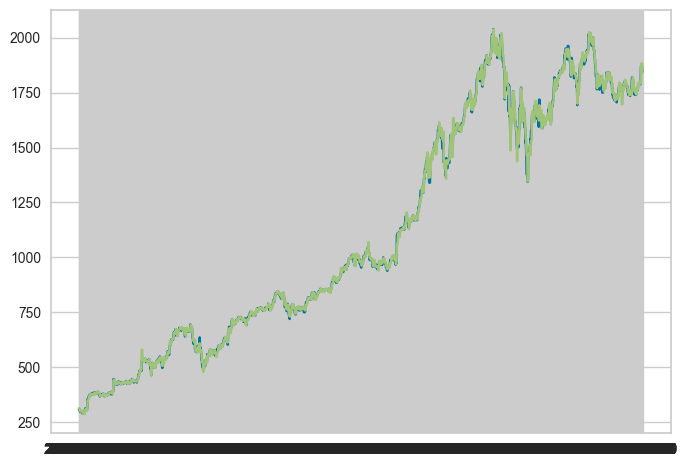

In [345]:
x_val = stocks['close_value']

y_val = stocks['day_date']
plt.plot(y_val, x_val)
plt.plot(stocks['open_value'])

### Closing and Opening Values are to similiar and should not be used in our model

In [346]:
stocks.head()

,day_date,close_value,volume,open_value,high_value,low_value,sentiment,Price Diff,amount
0,2015-01-02,308.52,2785167,312.58,314.75,306.9601,0.241379,-1.83,8.649336e+08
1,2015-01-03,308.52,2785167,312.58,314.75,306.9601,0.298507,0.00,8.649336e+08
2,2015-01-04,308.52,2785167,312.58,314.75,306.9601,0.223529,0.00,8.649336e+08
3,2015-01-05,302.19,2768215,307.01,308.38,300.8500,0.323843,-6.33,8.431983e+08
4,2015-01-06,295.29,3511003,302.24,303.00,292.3800,0.305825,-6.90,1.048965e+09


### Dropping columns which will not be used

In [347]:
stocks = stocks.drop('low_value', axis=1)

In [348]:
stocks.head()

,day_date,close_value,volume,open_value,high_value,sentiment,Price Diff,amount
0,2015-01-02,308.52,2785167,312.58,314.75,0.241379,-1.83,8.649336e+08
1,2015-01-03,308.52,2785167,312.58,314.75,0.298507,0.00,8.649336e+08
2,2015-01-04,308.52,2785167,312.58,314.75,0.223529,0.00,8.649336e+08
3,2015-01-05,302.19,2768215,307.01,308.38,0.323843,-6.33,8.431983e+08
4,2015-01-06,295.29,3511003,302.24,303.00,0.305825,-6.90,1.048965e+09


/var/folders/f0/zf6fxcgs5t778nd1ml7j0xlr0000gn/T/ipykernel_9769/3487781266.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



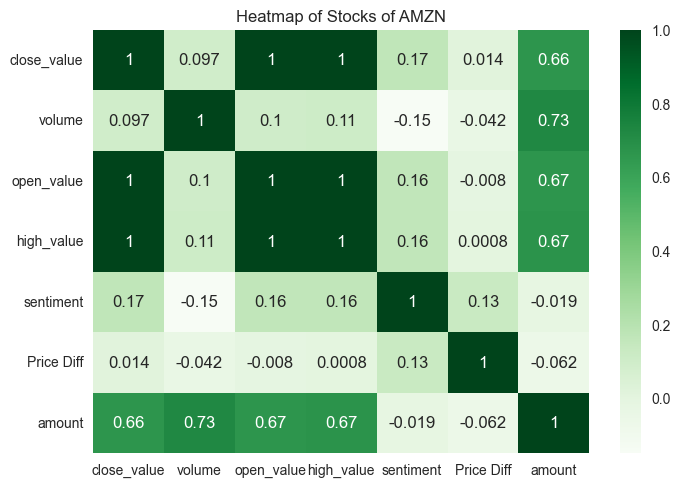

In [349]:
correlations = stocks.corr()
# annot=True displays the correlation values
sns.heatmap(correlations, annot=True, cmap="Greens").set(title='Heatmap of Stocks of AMZN');

In [350]:
st_scaled.head()

,close_value,volume,open_value,high_value,low_value,sentiment,Price Diff,amount
0,0.012308,0.082900,0.015013,0.013616,0.012566,0.453015,0.513402,0.011580
1,0.012308,0.082900,0.015013,0.013616,0.012566,0.521527,0.520233,0.011580
2,0.012308,0.082900,0.015013,0.013616,0.012566,0.431608,0.520233,0.011580
3,0.008696,0.082162,0.011833,0.009996,0.009029,0.551911,0.496603,0.010674
4,0.004759,0.114506,0.009110,0.006939,0.004127,0.530303,0.494475,0.019244


In [351]:
st_scaled

,close_value,volume,open_value,high_value,low_value,sentiment,Price Diff,amount
0,0.012308,0.082900,0.015013,0.013616,0.012566,0.453015,0.513402,0.011580
1,0.012308,0.082900,0.015013,0.013616,0.012566,0.521527,0.520233,0.011580
2,0.012308,0.082900,0.015013,0.013616,0.012566,0.431608,0.520233,0.011580
3,0.008696,0.082162,0.011833,0.009996,0.009029,0.551911,0.496603,0.010674
4,0.004759,0.114506,0.009110,0.006939,0.004127,0.530303,0.494475,0.019244
...,...,...,...,...,...,...,...,...
1820,0.903165,0.231105,0.911413,0.915270,0.914924,0.652313,0.524078,0.459194
1821,0.903165,0.231105,0.911413,0.915270,0.914924,0.657352,0.520233,0.459194
1822,0.903165,0.231105,0.911413,0.915270,0.914924,0.700051,0.520233,0.459194
1823,0.890092,0.121747,0.906321,0.905382,0.900229,0.672594,0.434710,0.260492


In [352]:
print(st_scaled.iloc[:, :-1].values)

[[0.01230771 0.08289999 0.01501287 ... 0.01256553 0.45301467 0.51340152]
 [0.01230771 0.08289999 0.01501287 ... 0.01256553 0.52152659 0.52023294]
 [0.01230771 0.08289999 0.01501287 ... 0.01256553 0.43160788 0.52023294]
 ...
 [0.90316451 0.23110509 0.91141264 ... 0.91492403 0.70005063 0.52023294]
 [0.89009221 0.12174711 0.90632082 ... 0.90022862 0.67259433 0.43470957]
 [0.89063427 0.07093472 0.88805421 ... 0.89537259 0.62654459 0.5237793 ]]


## Model
### Using train test split as using large dataset
### 30% Test 70% Train 

In [353]:
features = ['sentiment', 'amount']
target = [ 'close_value' ]

In [375]:
X_train, X_test, y_train, y_test = train_test_split(st_scaled[features], st_scaled[target], test_size=0.3, random_state=42)

In [355]:
print(len(y_test))
print(len(X_test))
print(len(X_train))
print(len(y_train))

548
548
1277
1277


## Ranodm Forest Generator
## Performance Metrics


In [376]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import  mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error, recall_score
regressor = RandomForestRegressor(n_estimators = 100, random_state = 20)
# 100 estimators, 20 random state
regressor.fit(X_train, y_train)
# fit the model

accuracy = regressor.score(X_test, y_test)
#r2 score


y_pred_test = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
mape_test =mean_absolute_percentage_error(y_test, y_pred_test)

rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred_test)), '.3f'))

# print(y_pred)
print(f"The accuracy r2 score of the model is {round(accuracy,3)} ")
print(f"The MAE testing model is {round(mae_test,3)}")
print(f"The MSE testing model is {round(mse_test,3)} ")
print(f"The MAPE  model is {round(mape_test,3)*100} %")
print("\nRMSE: ", rmse)
print('Indicaticting a good model')
print('R2 score is:',r2_score(y_test, regressor.predict(X_test)))


The accuracy r2 score of the model is 0.697 
The MAE testing model is 0.118
The MSE testing model is 0.027 
The MAPE  model is 44.3 %

RMSE:  0.165
Indicaticting a good model
R2 score is: 0.6974548957407664


/var/folders/f0/zf6fxcgs5t778nd1ml7j0xlr0000gn/T/ipykernel_9769/1039454108.py:5: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [357]:
print(len(y_test))
print(len(X_test))
print(len(X_train))
print(len(y_train))

548
548
1277
1277


## Plotting how accurate the model is using YellowBrick

In [374]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(regressor)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()


## POINT TO NOTE: 
## This graph is no longer showing however it did work, the working version is on my GitHub and in the presentation. 
### Link to github commit when it worked: https://github.com/Karl-Gilmartin/Twitter-NASDAQ/blob/main/ref_main.ipynb

### Metrics using a model called "Ridge" which is not as accurate

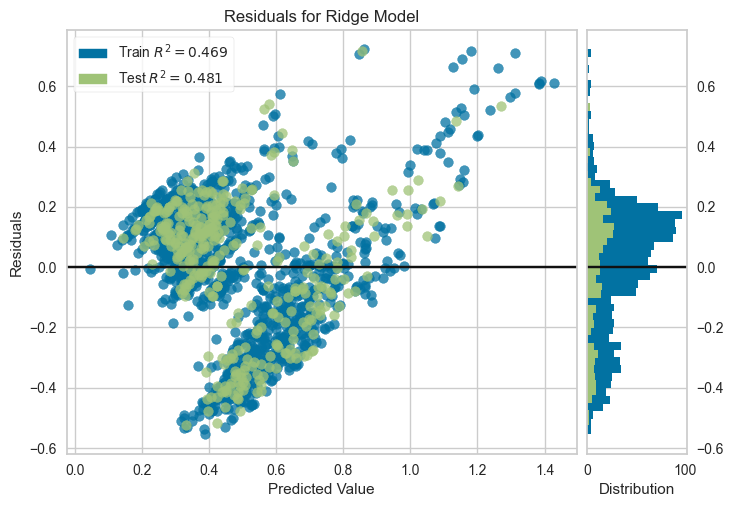

<Axes: title={'center': 'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [368]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot



# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(st_scaled[features], st_scaled[target], test_size=0.2, random_state=42)


# Instantiate the linear model and visualizer
model = Ridge()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()   

### Point to note: different r2 score as these are doning using a different library

In [221]:
print(X_train)

      sentiment    amount
711    0.607340  0.143945
1405   0.578389  0.558631
759    0.660174  0.103077
118    0.581986  0.040000
1145   0.631212  0.368496
...         ...       ...
1130   0.565101  0.639826
1294   0.493028  0.323718
860    0.426534  0.061901
1459   0.528332  0.411064
1126   0.515534  0.506006

[1277 rows x 2 columns]


### Importance of features

In [377]:
print('Importance of features are:', regressor.feature_importances_)

Importance of features are: [0.14300537 0.85699463]


### This shows that both of the features used are important, more so the amount rather than the sentiment

## Linear Regression (Not as accurate)

In [378]:
model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)



0.4613403095461578

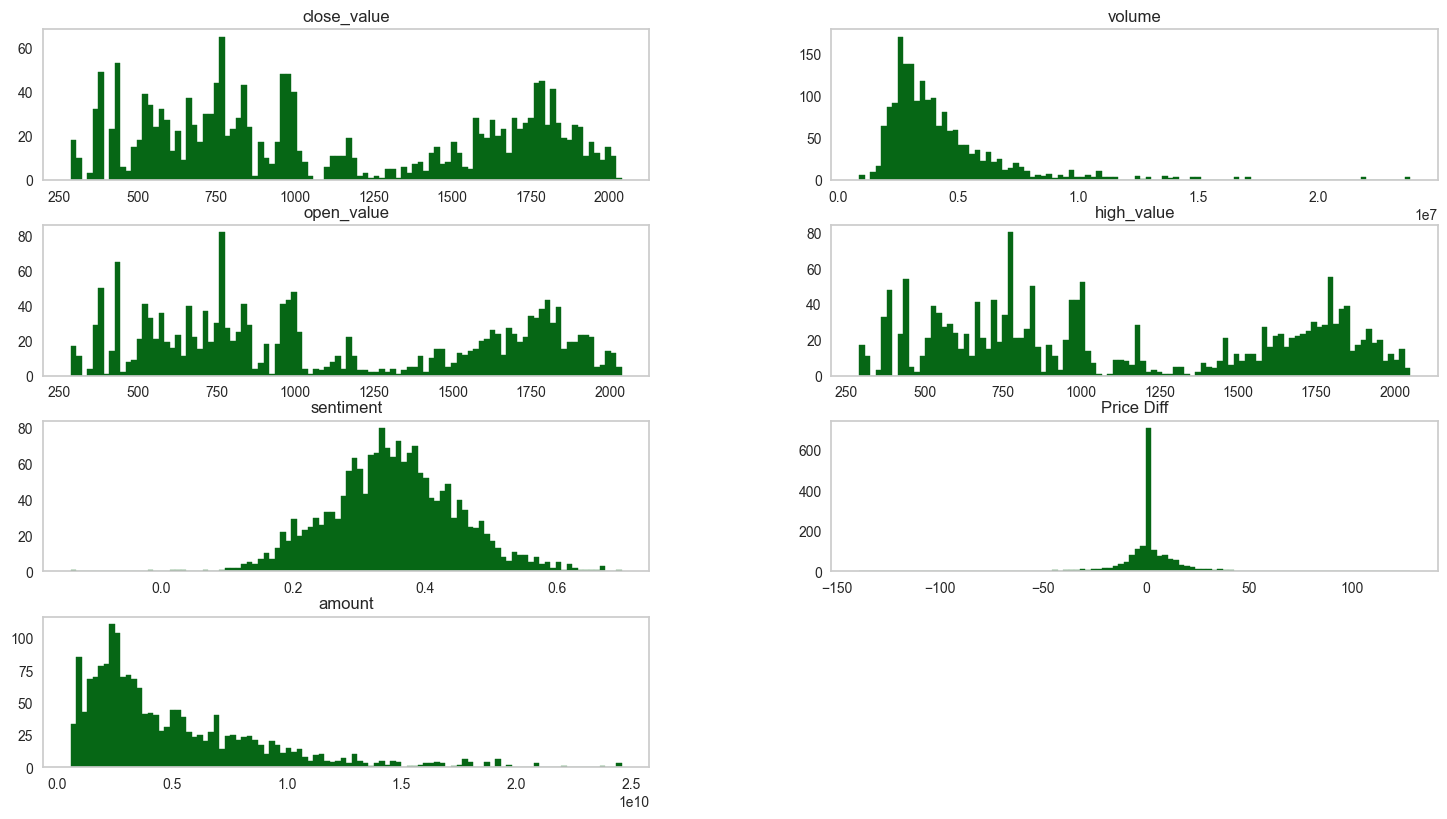

In [379]:
stock_col = (stocks.columns)
stocks[stock_col].hist(stacked=False, bins=100, figsize=(18,35), layout=(14,2), color= "#066715", ec="#066715", grid=False);

### Information for the linear regression function

In [380]:
print(model.intercept_)
print(model.coef_)

[-0.01871633]
[[0.44472017 1.27063822]]


## Tesla Model Y release exploration

In [397]:
reaction.loc[1553]
#1492


date     [datetime.date(2019, 4, 2)]
AAPL                        0.379397
AMZN                         0.26045
TSLA                        0.150778
MSFT                        0.317919
GOOG                        0.173228
GOOGL                       0.316667
Name: 1553, dtype: object

### Model Y got released in March of 2019, using the period from 31/01/19 to 02/04/19 to explore any trends

In [398]:
tsla_df = reaction.loc[1492:1553]
# 1493
# 1551

In [399]:
tsla_df.head()

,date,AAPL,AMZN,TSLA,MSFT,GOOG,GOOGL
1492,"[datetime.date(2019, 1, 31)]",0.330049,0.162544,0.184713,0.316953,0.275168,0.316279
1493,"[datetime.date(2019, 2, 1)]",0.364611,0.240582,0.153912,0.246445,0.256637,0.200000
1494,"[datetime.date(2019, 2, 2)]",0.438961,0.406780,0.166415,0.362069,0.250000,0.351562
1495,"[datetime.date(2019, 2, 3)]",0.559524,0.412088,0.193798,0.418605,0.145833,0.417266
1496,"[datetime.date(2019, 2, 4)]",0.389677,0.307414,0.250213,0.386555,0.291304,0.239688


In [400]:
tsla_df.tail()

,date,AAPL,AMZN,TSLA,MSFT,GOOG,GOOGL
1549,"[datetime.date(2019, 3, 29)]",0.353191,0.360748,0.164767,0.394904,0.222222,0.272222
1550,"[datetime.date(2019, 3, 30)]",0.421538,0.362832,0.031579,0.283019,0.120690,0.404255
1551,"[datetime.date(2019, 3, 31)]",0.505495,0.534759,0.137371,0.349515,0.257143,0.428571
1552,"[datetime.date(2019, 4, 1)]",0.300813,0.229794,0.147425,0.184783,0.021505,0.289017
1553,"[datetime.date(2019, 4, 2)]",0.379397,0.260450,0.150778,0.317919,0.173228,0.316667


In [401]:
tsla_df = tsla_df.reset_index(drop=True)

In [402]:
tsla_df.tail()

,date,AAPL,AMZN,TSLA,MSFT,GOOG,GOOGL
57,"[datetime.date(2019, 3, 29)]",0.353191,0.360748,0.164767,0.394904,0.222222,0.272222
58,"[datetime.date(2019, 3, 30)]",0.421538,0.362832,0.031579,0.283019,0.120690,0.404255
59,"[datetime.date(2019, 3, 31)]",0.505495,0.534759,0.137371,0.349515,0.257143,0.428571
60,"[datetime.date(2019, 4, 1)]",0.300813,0.229794,0.147425,0.184783,0.021505,0.289017
61,"[datetime.date(2019, 4, 2)]",0.379397,0.260450,0.150778,0.317919,0.173228,0.316667


In [403]:
tsla_stocks.tail()
# tsla_df = tsla_df.drop('AMZN', index=1)

,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value
57,TSLA,2019-03-29,279.86,5980355,278.70,280.16,274.500
58,TSLA,2019-03-30,279.86,5980355,278.70,280.16,274.500
59,TSLA,2019-03-31,279.86,5980355,278.70,280.16,274.500
60,TSLA,2019-04-01,289.18,8093134,282.62,289.20,281.281
61,TSLA,2019-04-02,285.88,5427184,288.30,289.44,283.880


In [404]:
tsla_stocks['sentiment'] = tsla_df['TSLA']

In [405]:
tsla_stocks.head()

,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value,sentiment
0,TSLA,2019-01-31,307.02,12545190,301.00,311.5636,294.00,0.184713
1,TSLA,2019-02-01,312.21,7263618,305.42,316.1000,303.50,0.153912
2,TSLA,2019-02-02,312.21,7263618,305.42,316.1000,303.50,0.166415
3,TSLA,2019-02-03,312.21,7263618,305.42,316.1000,303.50,0.193798
4,TSLA,2019-02-04,312.89,7344076,312.98,315.3000,301.88,0.250213


In [406]:
tsla_stocks = tsla_stocks.drop(['ticker_symbol'], axis=1)

In [407]:
tsla_stocks.set_index('day_date', inplace=True)

In [408]:
tsla_stocks.tail()

,close_value,volume,open_value,high_value,low_value,sentiment
day_date,,,,,,
2019-03-29,279.86,5980355,278.70,280.16,274.500,0.164767
2019-03-30,279.86,5980355,278.70,280.16,274.500,0.031579
2019-03-31,279.86,5980355,278.70,280.16,274.500,0.137371
2019-04-01,289.18,8093134,282.62,289.20,281.281,0.147425
2019-04-02,285.88,5427184,288.30,289.44,283.880,0.150778


In [409]:
tsla_df = tsla_df.reset_index(drop=True)

In [410]:
from sklearn.preprocessing import MinMaxScaler
tsla_st_copy = tsla_stocks.copy()
 #We create a copy so we can still refer to the original dataframe later
scaler = MinMaxScaler()

tsla_st_columns = tsla_stocks.columns
tsla_st_scaled = pd.DataFrame(scaler.fit_transform(tsla_st_copy), columns=tsla_st_columns)
tsla_st_scaled.head()

,close_value,volume,open_value,high_value,low_value,sentiment
0,0.764812,0.456361,0.689546,0.792394,0.646459,0.790821
1,0.849992,0.177693,0.763360,0.866689,0.801779,0.692453
2,0.849992,0.177693,0.763360,0.866689,0.801779,0.732382
3,0.849992,0.177693,0.763360,0.866689,0.801779,0.819835
4,0.861152,0.181938,0.889613,0.853587,0.775293,1.000000


<Axes: >

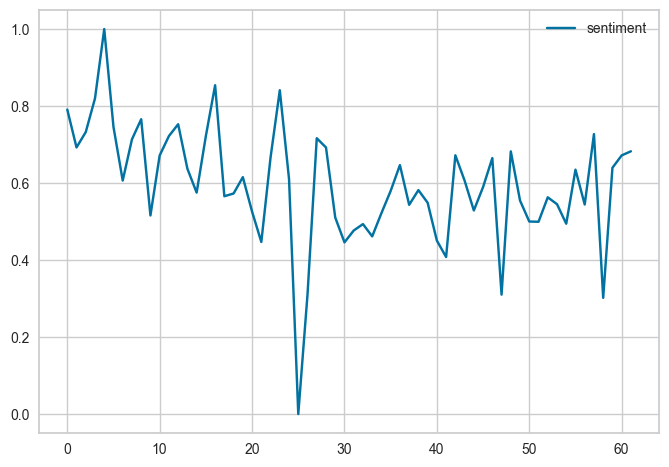

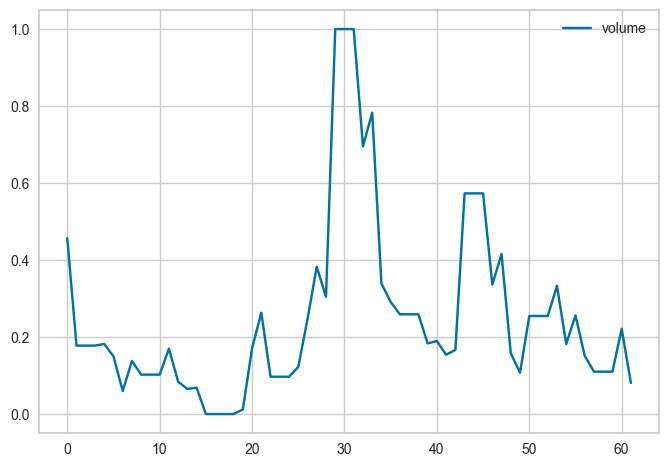

In [411]:
tsla_st_scaled.plot(y='sentiment')
tsla_st_scaled.plot(y='volume')

# END